### Importação das bibliotecas

In [1]:
import pandas as pd

### Leitura dos dados

In [2]:
df =  pd.read_table('Questão 1 - Base.txt')

## Exploração dos Dados

### Visão parcial dos dados

In [3]:
df.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,FX0,210.00
1,403001,2019-01-01,FX1,1097.18
2,403499,2019-01-01,FX0,1209.88
3,403670,2019-01-01,FX0,667.40
4,404183,2019-01-01,FX1,1239.52


In [4]:
df.shape

(2728249, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728249 entries, 0 to 2728248
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID_CONTA       int64  
 1   DT_VENCIMENTO  object 
 2   DS_ROLAGEM     object 
 3   VL_FATURA      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.3+ MB


### Converter a variável 'DT_VENCIMENTO' para o tipo DATE

In [6]:
df['DT_VENCIMENTO'] = pd.to_datetime(df['DT_VENCIMENTO'])

### Verificando se há valores nulos

In [7]:
df.isnull().sum()

ID_CONTA         0
DT_VENCIMENTO    0
DS_ROLAGEM       0
VL_FATURA        0
dtype: int64

### Quantidade de Contas

In [8]:
df['ID_CONTA'].nunique()

458842

### Distribuição de faturas pagas no mês anterior

In [9]:
df['DS_ROLAGEM'].value_counts()

FX0    2481796
FX1     246453
Name: DS_ROLAGEM, dtype: int64

In [10]:
# !pip install plotly

#  import plotly.express as px

# Etapa 1: Criar gráfico
#  for coluna in df.columns:
    # Para edições nos gráficos: https://plotly.com/python/histograms/
#    grafico1 = px.histogram(df, x="Dependentes", color="Churn", color_discrete_sequence=["blue", "red"])
    # Etapa 2: Exibir gráfico
#    grafico1.show()

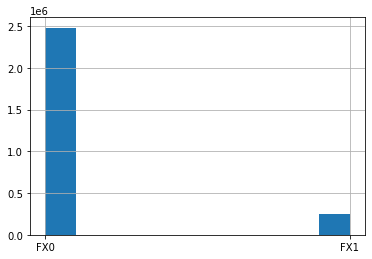

In [11]:
df['DS_ROLAGEM'].hist();

In [12]:
df['DS_ROLAGEM'].value_counts(normalize=True) * 100

FX0    90.966624
FX1     9.033376
Name: DS_ROLAGEM, dtype: float64

In [13]:
# Setando a variável 'DT_VENCIMENTO' como index 
df.set_index('DT_VENCIMENTO', inplace=True)

In [14]:
# Agrupando por mês os valores das faturas e aplicando a média, o valor mínimo e máximo da fatura
df.groupby(pd.Grouper(freq='M'))['VL_FATURA'].agg(['mean', 'min', 'max'])

,mean,min,max
DT_VENCIMENTO,,,
2019-01-31,463.261822,30.00,17046.37
2019-02-28,481.237717,30.03,18082.05
2019-03-31,490.117417,30.00,13175.51
2019-04-30,497.341462,30.02,13737.43
2019-05-31,509.895617,30.00,20556.23
2019-06-30,512.915118,30.02,19075.92
2019-07-31,518.815810,30.00,14526.75
2019-08-31,525.484887,30.00,19624.60
2019-09-30,548.157140,30.00,22647.48


### Testes Realizados

In [15]:
# Pegando apenas 10 mil linhas para acelerar os testes
teste = df.head(10000)
teste.head()

,ID_CONTA,DS_ROLAGEM,VL_FATURA
DT_VENCIMENTO,,,
2019-01-01,402467,FX0,210.00
2019-01-01,403001,FX1,1097.18
2019-01-01,403499,FX0,1209.88
2019-01-01,403670,FX0,667.40
2019-01-01,404183,FX1,1239.52


In [16]:
teste.groupby(pd.Grouper(freq='D'))['VL_FATURA'].mean()

DT_VENCIMENTO
2019-01-01    555.099993
2019-01-02           NaN
2019-01-03    322.786720
2019-01-04           NaN
2019-01-05    578.378985
2019-01-06           NaN
2019-01-07           NaN
2019-01-08    428.092669
Freq: D, Name: VL_FATURA, dtype: float64

In [17]:
teste.groupby('DT_VENCIMENTO')['VL_FATURA'].mean()

DT_VENCIMENTO
2019-01-01    555.099993
2019-01-03    322.786720
2019-01-05    578.378985
2019-01-08    428.092669
Name: VL_FATURA, dtype: float64

In [18]:
teste[teste['DS_ROLAGEM'] == 'FX0'].groupby(pd.Grouper(freq='D')).count()['DS_ROLAGEM']

DT_VENCIMENTO
2019-01-01    4130
2019-01-02       0
2019-01-03    1965
2019-01-04       0
2019-01-05    1945
2019-01-06       0
2019-01-07       0
2019-01-08    1242
Freq: D, Name: DS_ROLAGEM, dtype: int64

In [19]:
teste[teste['DS_ROLAGEM'] == 'FX1'].groupby(pd.Grouper(freq='D')).count()['DS_ROLAGEM']

DT_VENCIMENTO
2019-01-01    290
2019-01-02      0
2019-01-03    215
2019-01-04      0
2019-01-05     95
2019-01-06      0
2019-01-07      0
2019-01-08    118
Freq: D, Name: DS_ROLAGEM, dtype: int64

### 1.1 – Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior? 

In [20]:
# Quantidade de faturas não pagas por mês
df[df['DS_ROLAGEM'] == 'FX1'].groupby(pd.Grouper(freq='M')).count()['DS_ROLAGEM']

DT_VENCIMENTO
2019-01-31    22835
2019-02-28    27928
2019-03-31    33432
2019-04-30    25380
2019-05-31    30321
2019-06-30    25977
2019-07-31    29889
2019-08-31    28736
2019-09-30    21955
Freq: M, Name: DS_ROLAGEM, dtype: int64

In [21]:
# Quantidade de faturas pagas por mês
df[df['DS_ROLAGEM'] == 'FX0'].groupby(pd.Grouper(freq='M')).count()['DS_ROLAGEM']

DT_VENCIMENTO
2019-01-31    290548
2019-02-28    285921
2019-03-31    273886
2019-04-30    276950
2019-05-31    271544
2019-06-30    278389
2019-07-31    281005
2019-08-31    288331
2019-09-30    235222
Freq: M, Name: DS_ROLAGEM, dtype: int64

In [22]:
# Quantidade de faturas por mês
total = df.groupby(pd.Grouper(freq='M')).count()['DS_ROLAGEM'].values

# Quantidade de faturas pagas por mês
faturas_pagas = df[df['DS_ROLAGEM'] == 'FX0'].groupby(pd.Grouper(freq='M')).count()['DS_ROLAGEM'].values

# Quantidade de faturas não pagas por mês
faturas_nao_pagas = df[df['DS_ROLAGEM'] == 'FX1'].groupby(pd.Grouper(freq='M')).count()['DS_ROLAGEM'].values

In [23]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro']

novo_df = {'Mês' : meses, 
           'Faturas Pagas' : faturas_pagas, 
           'Faturas Não Pagas' : faturas_nao_pagas, 
           'Total' : total}

In [24]:
novo_df = pd.DataFrame(novo_df)

In [25]:
novo_df['% Faturas Pagas'] = (novo_df['Faturas Pagas'] / novo_df['Total']) * 100
novo_df['% Faturas Não Pagas'] = (novo_df['Faturas Não Pagas'] / novo_df['Total']) * 100

In [26]:
novo_df['% Faturas Pagas'] = novo_df['% Faturas Pagas'].apply(lambda x: round(x, 2))
novo_df['% Faturas Não Pagas'] = novo_df['% Faturas Não Pagas'].apply(lambda x: round(x, 2))

In [27]:
novo_df

,Mês,Faturas Pagas,Faturas Não Pagas,Total,% Faturas Pagas,% Faturas Não Pagas
0,Janeiro,290548,22835,313383,92.71,7.29
1,Fevereiro,285921,27928,313849,91.10,8.90
2,Março,273886,33432,307318,89.12,10.88
3,Abril,276950,25380,302330,91.61,8.39
4,Maio,271544,30321,301865,89.96,10.04
5,Junho,278389,25977,304366,91.47,8.53
6,Julho,281005,29889,310894,90.39,9.61
7,Agosto,288331,28736,317067,90.94,9.06
8,Setembro,235222,21955,257177,91.46,8.54


### 1.3 – Utilizando como referência a base calculada na questão anterior, identifique qual das 3 variáveis calculadas tem o maior potencial preditivo em relação a variável DS_ROLAGEM do mês de setembro. 

In [ ]:
# Separar dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Criar modelo de regressão linear sem escalonamento de features para predição
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
# MSE do modelo
MSE = mean_squared_error(y_test, y_pred)
MSE